In [1]:
import numpy as np
import pynbody
import matplotlib.pyplot as plt
import matplotlib as mpl
import pynbody.plot as pp
import pickle
import pandas as pd
import pynbody.plot.sph as sph

In [2]:
%matplotlib inline
#mpl.rcParams['font.monospace'] = 'Terminal'
mpl.rc('font',**{'family':'serif','monospace':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams.update({'font.size': 9})

In [3]:
from Star import *
from Load import *
from bulk import *

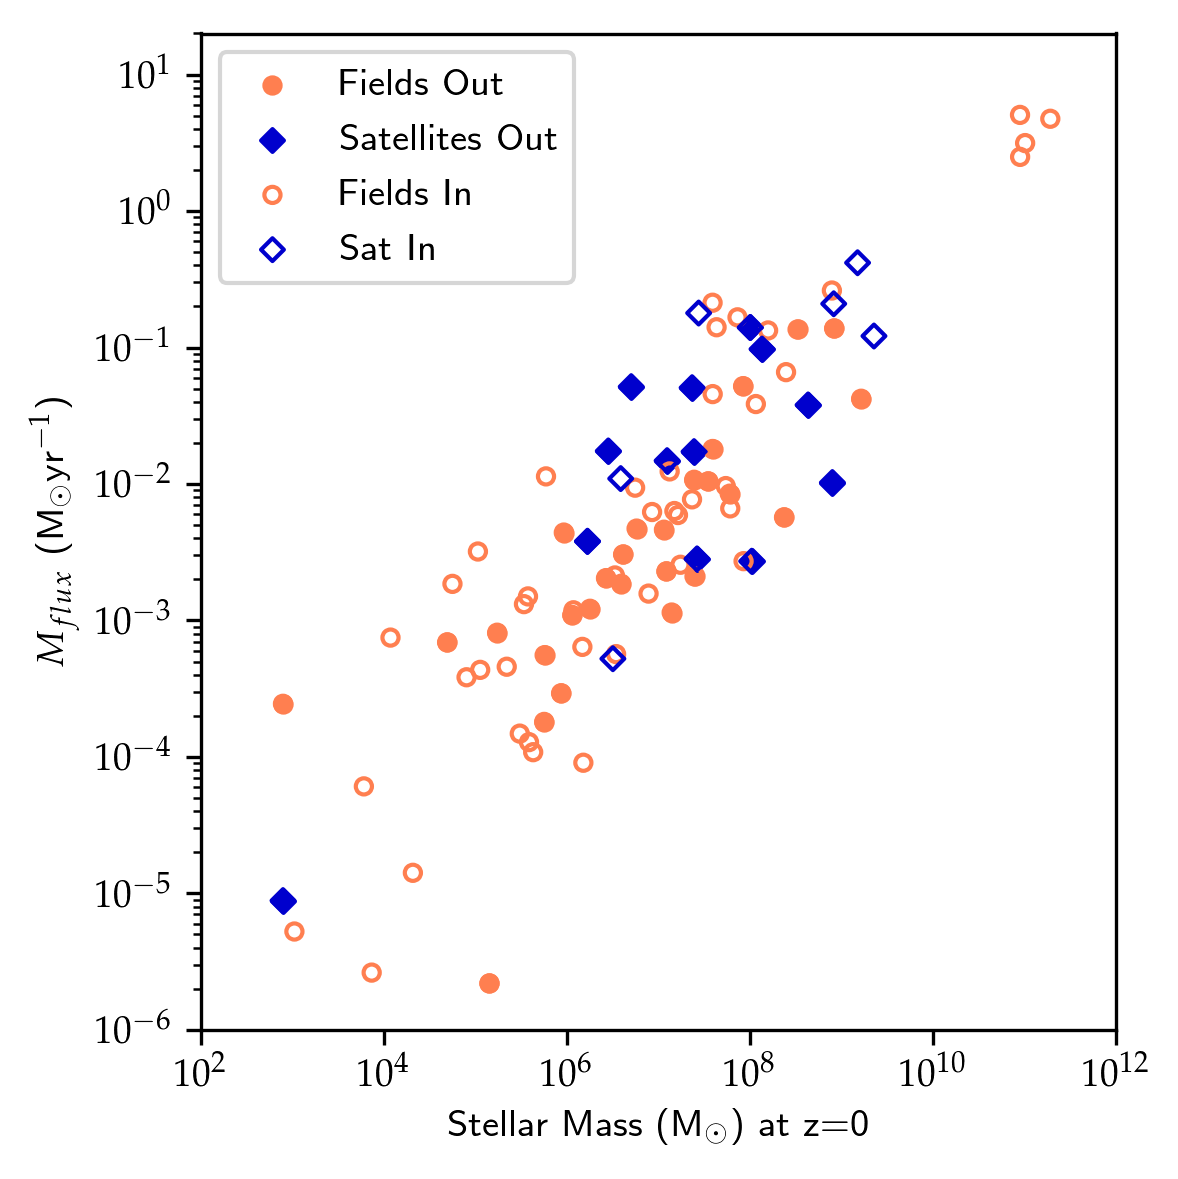

In [13]:
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(data['M_star'][f], data['G_outflow_2.5'][f] + data['G_inflow_2.5'][f], c='coral', label='Fields Out', s=15)
plt.scatter(data['M_star'][s], data['G_outflow_2.5'][s] + data['G_inflow_2.5'][s], c='mediumblue', label='Satellites Out', marker='D', s=15)
plt.scatter(data['M_star'][f], abs(data['G_outflow_2.5'][f] + data['G_inflow_2.5'][f]), facecolors='none', edgecolors='coral', label='Fields In', s=15)
plt.scatter(data['M_star'][s], abs(data['G_outflow_2.5'][s] + data['G_inflow_2.5'][s]), facecolors='none', edgecolors='mediumblue', label='Sat In', marker='D', s=15)

plt.legend()

# ng = np.array(data['G_inflow_2.5']==0)
# fm = np.array(data['M_star'][ng & f])
# sm = np.array(data['M_star'][ng & s])

# plt.errorbar(fm,2e-6 + (fm*0),xerr=0.1,yerr=.5e-6, color = "darkgreen",fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)
# plt.errorbar(sm,2e-6+(sm*0),xerr=0.1,yerr=.5e-6,color = "orange", fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)

plt.loglog()
plt.ylim(1e-6, 20)
plt.xlim(1e2, 1e12)
plt.xlabel(r'Stellar Mass (M$_{\odot}$) at z=0')
plt.ylabel(r'$M_{flux}$ (M$_{\odot}$yr$^{-1}$)')
#plt.title('Evidence of Strangulation 0.25 Rvir', size=20)
plt.legend()
plt.tight_layout()
plt.savefig('J', dpi=300)
plt.show()

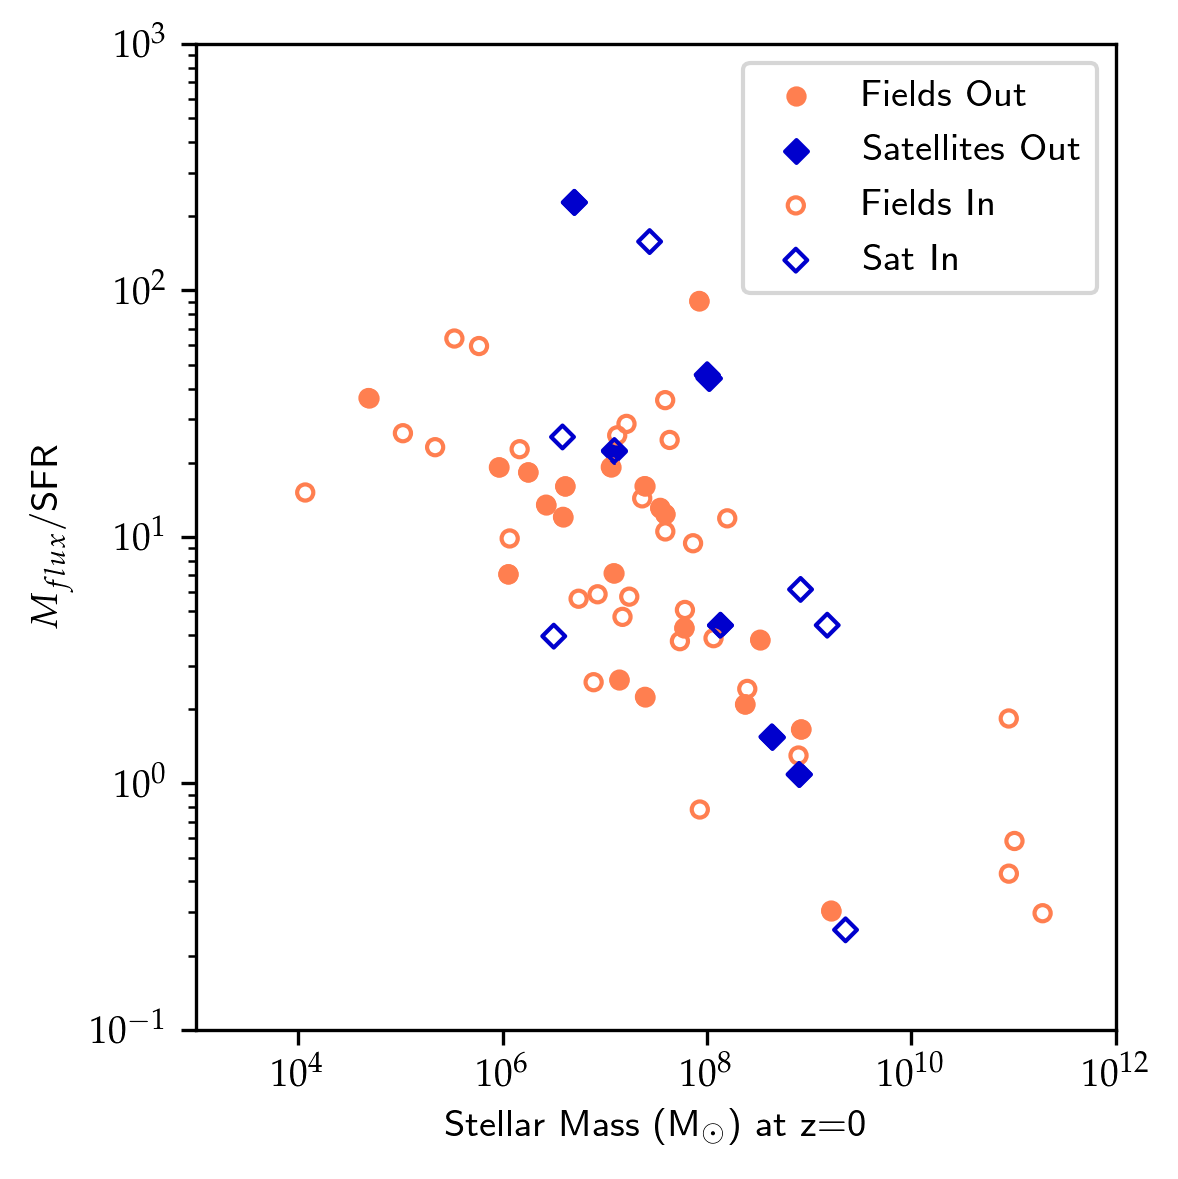

In [30]:
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(data['M_star'][f], (data['G_outflow_2.5'][f] + data['G_inflow_2.5'][f])/data['SFR'][f], c='coral', label='Fields Out', s=15)
plt.scatter(data['M_star'][s], (data['G_outflow_2.5'][s] + data['G_inflow_2.5'][s])/data['SFR'][s], c='mediumblue', label='Satellites Out', marker='D', s=15)
plt.scatter(data['M_star'][f], abs(data['G_outflow_2.5'][f] + data['G_inflow_2.5'][f])/data['SFR'][f], facecolors='none', edgecolors='coral', label='Fields In', s=15)
plt.scatter(data['M_star'][s], abs(data['G_outflow_2.5'][s] + data['G_inflow_2.5'][s])/data['SFR'][s], facecolors='none', edgecolors='mediumblue', label='Sat In', marker='D', s=15)

plt.legend()

# ng = np.array(data['G_inflow_2.5']==0)
# fm = np.array(data['M_star'][ng & f])
# sm = np.array(data['M_star'][ng & s])

# plt.errorbar(fm,2e-6 + (fm*0),xerr=0.1,yerr=.5e-6, color = "darkgreen",fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)
# plt.errorbar(sm,2e-6+(sm*0),xerr=0.1,yerr=.5e-6,color = "orange", fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)

plt.loglog()
plt.ylim(1e-1, 1e3)
plt.xlim(1e3, 1e12)
plt.xlabel(r'Stellar Mass (M$_{\odot}$) at z=0')
plt.ylabel(r'$M_{flux}$/SFR')
#plt.title('Evidence of Strangulation 0.25 Rvir', size=20)
plt.legend()
plt.tight_layout()
plt.savefig('J', dpi=300)
plt.show()

In [33]:
from Time import *

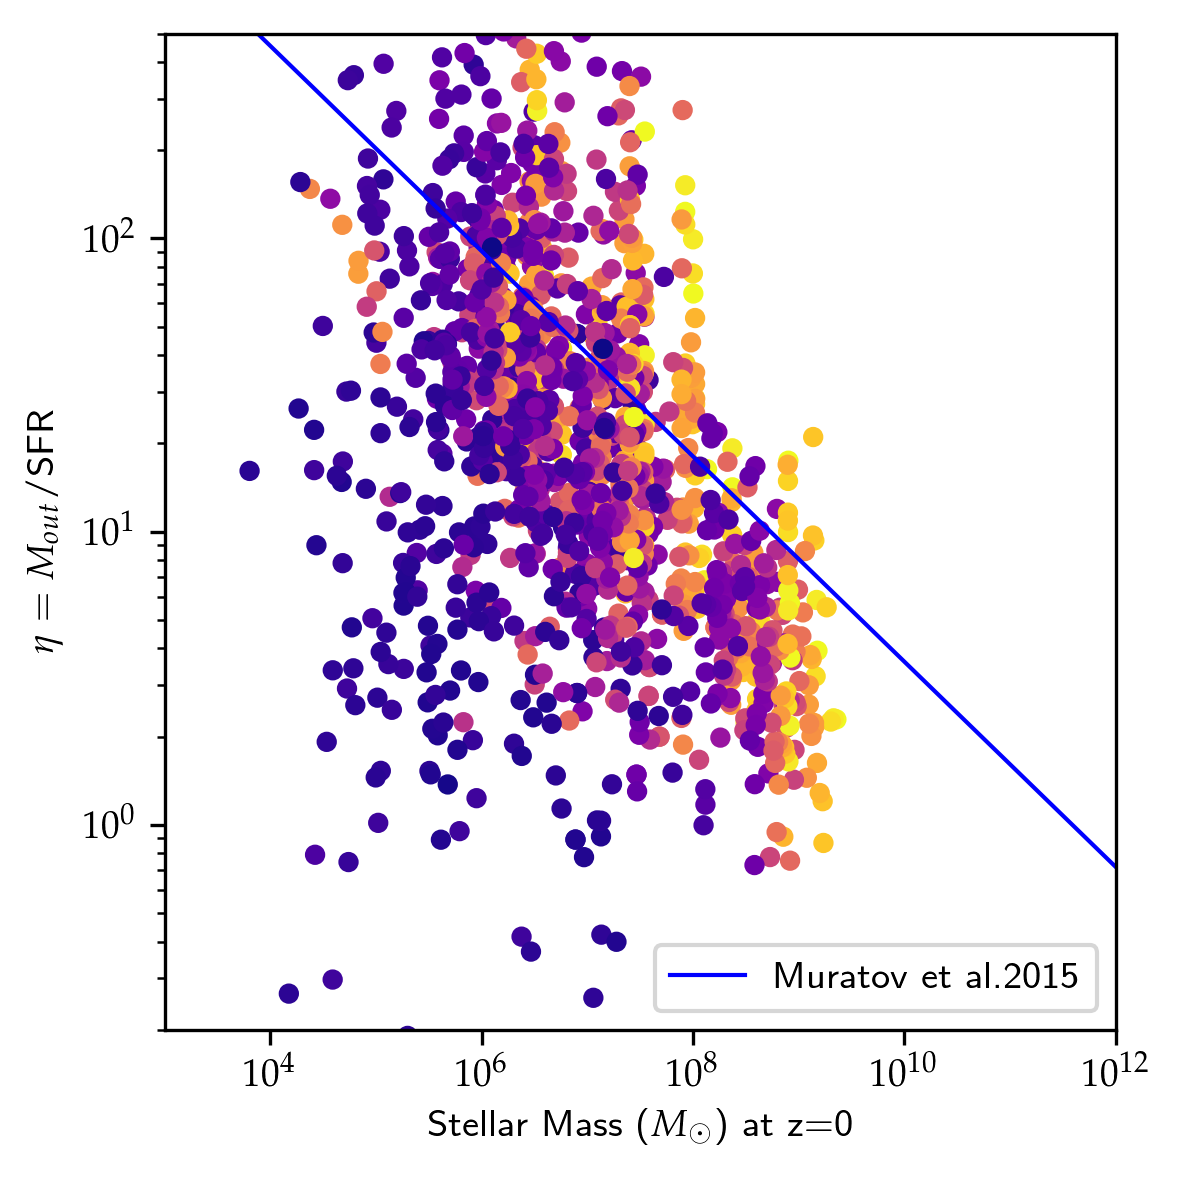

In [34]:
#Plot N value vs Stellar Mass
# EQ
xfit = np.array([100,1e13])
n = 3.6*(xfit/10**10)**(-.35)    #unitlessRogue['G_outflow_1.5']
plt.figure(figsize=(4,4), dpi=300)
# plt.scatter(data['M_star'][q & f], data['G_outflow_2.5'][q & f]/data['SFR'][q & f], facecolors='none', edgecolors='darkgreen', label=None, s=15)
# plt.scatter(data['M_star'][q & s], data['G_outflow_2.5'][q & s]/data['SFR'][q & s], facecolors='none', edgecolors='orange', label=None, marker='D', s=15)
# plt.scatter(data['M_star'][u & f], data['G_outflow_2.5'][u & f]/data['SFR'][u & f], c='darkgreen', label='Field', s=15)
# plt.scatter(data['M_star'][u & s], data['G_outflow_2.5'][u & s]/data['SFR'][u & s], c='orange', label='Satellite', marker='D', s=15)

plt.scatter(datat1['mstar'], datat1['outflow_23']/datat1['sfr'], c=datat1['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat2['mstar'], datat2['outflow_23']/datat2['sfr'], c=datat2['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat3['mstar'], datat3['outflow_23']/datat3['sfr'], c=datat3['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat4['mstar'], datat4['outflow_23']/datat4['sfr'], c=datat4['time'], cmap='plasma', label=None, s=15)
#plt.scatter(datat4['mstar'][datat4['time']>13.7], datat4['outflow_23'][datat4['time']>13.7]/datat4['sfr'][datat4['time']>13.7], c='green')
# plt.scatter(datat4['mstar'][q & s], datat4['outflow_2.5'][q & s]/datat4['SFR'][q & s], facecolors='none', edgecolors='orange', label=None, marker='D', s=15)
# plt.scatter(datat4['mstar'][u & f], datat4['outflow_2.5'][u & f]/datat4['SFR'][u & f], c='darkgreen', label='Field', s=15)
# plt.scatter(datat4['mstar'][u & s], datat4['outflow_2.5'][u & s]/datat4['SFR'][u & s], c='orange', label='Satellite', marker='D', s=15)


# ng = np.array(data['G_outflow_2.5']==0)
# fm = np.array(data['M_star'][f & ng])
# sm = np.array(data['M_star'][s & ng])

# plt.errorbar(fm,.4 + (fm*0),xerr=0.1,yerr=.1, color = "darkgreen",fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)
# plt.errorbar(sm,.4+(sm*0),xerr=0.1,yerr=.1,color = "orange", fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)
plt.plot(xfit, n, c='b', linewidth='1', label='Muratov et al.2015')

plt.legend()
plt.loglog()
plt.ylim(.2, 5e2)
plt.xlim(1e3, 1e12)
plt.xlabel(r'Stellar Mass ($M_{\odot}$) at z=0')
plt.ylabel(r'$\eta = M_{out}/$SFR')
plt.tight_layout()
#plt.title('Power Law Fit Muratov 0.25', size=20)

plt.savefig('B.png', dpi=300)

No handles with labels found to put in legend.


(0.3, 100.0)

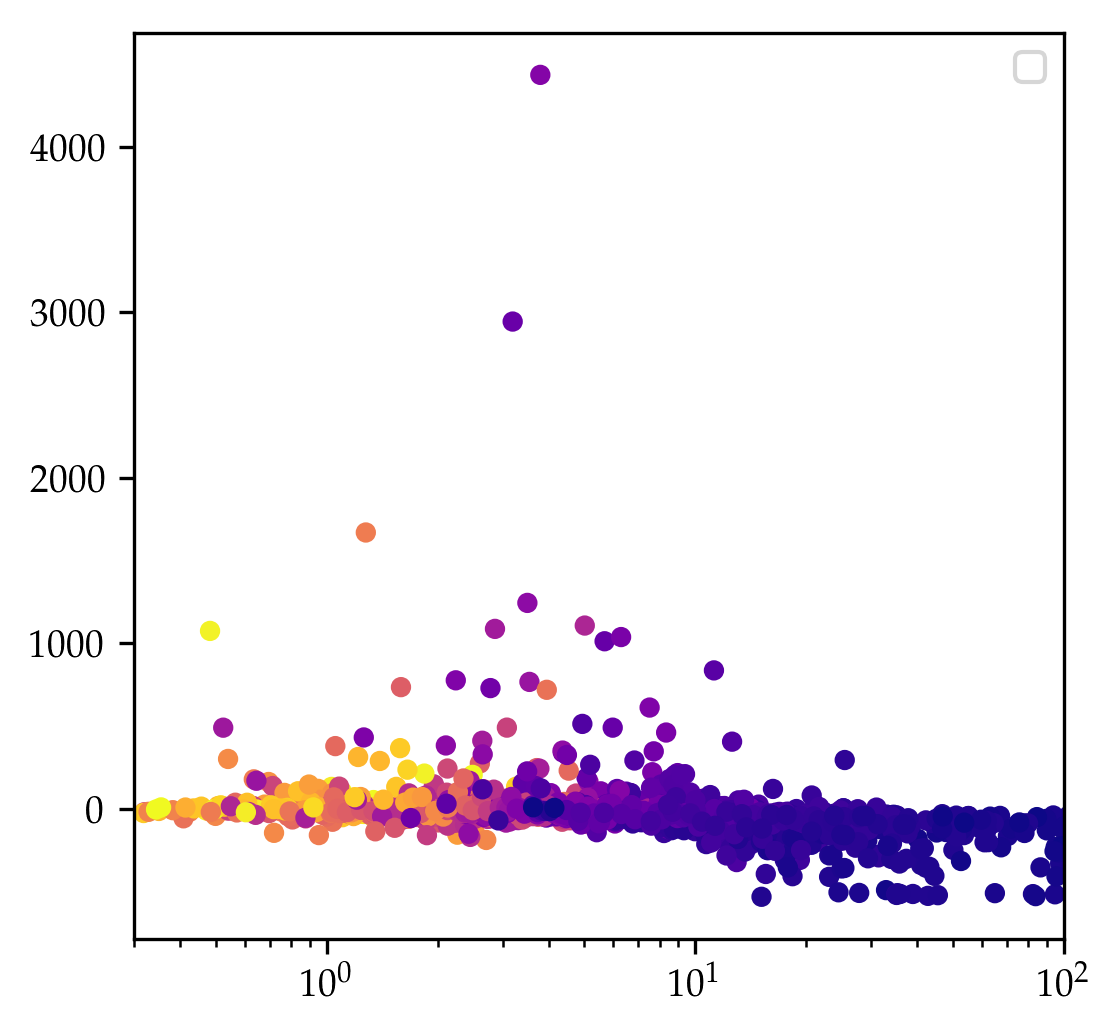

In [35]:
xfit = np.array([100,1e13])
n1 = 3.6*(datat1['mstar']/10**10)**(-.35)    #unitlessRogue['G_outflow_1.5']
n2 = 3.6*(datat2['mstar']/10**10)**(-.35)
n3 = 3.6*(datat3['mstar']/10**10)**(-.35)
n4 = 3.6*(datat4['mstar']/10**10)**(-.35)
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(datat1['h1dist'], datat1['outflow_23']/datat1['sfr'] - n1, c=datat1['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat2['h1dist'], datat2['outflow_23']/datat2['sfr'] - n2, c=datat2['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat3['h1dist'], datat3['outflow_23']/datat3['sfr'] - n3, c=datat3['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat4['h1dist'], datat4['outflow_23']/datat4['sfr'] - n4, c=datat4['time'], cmap='plasma', label=None, s=15)
plt.legend()
plt.semilogx()
# plt.loglog()
# plt.ylim(.2, 5e2)
plt.xlim(3e-1, 1e2)

No handles with labels found to put in legend.


(0.3, 100.0)

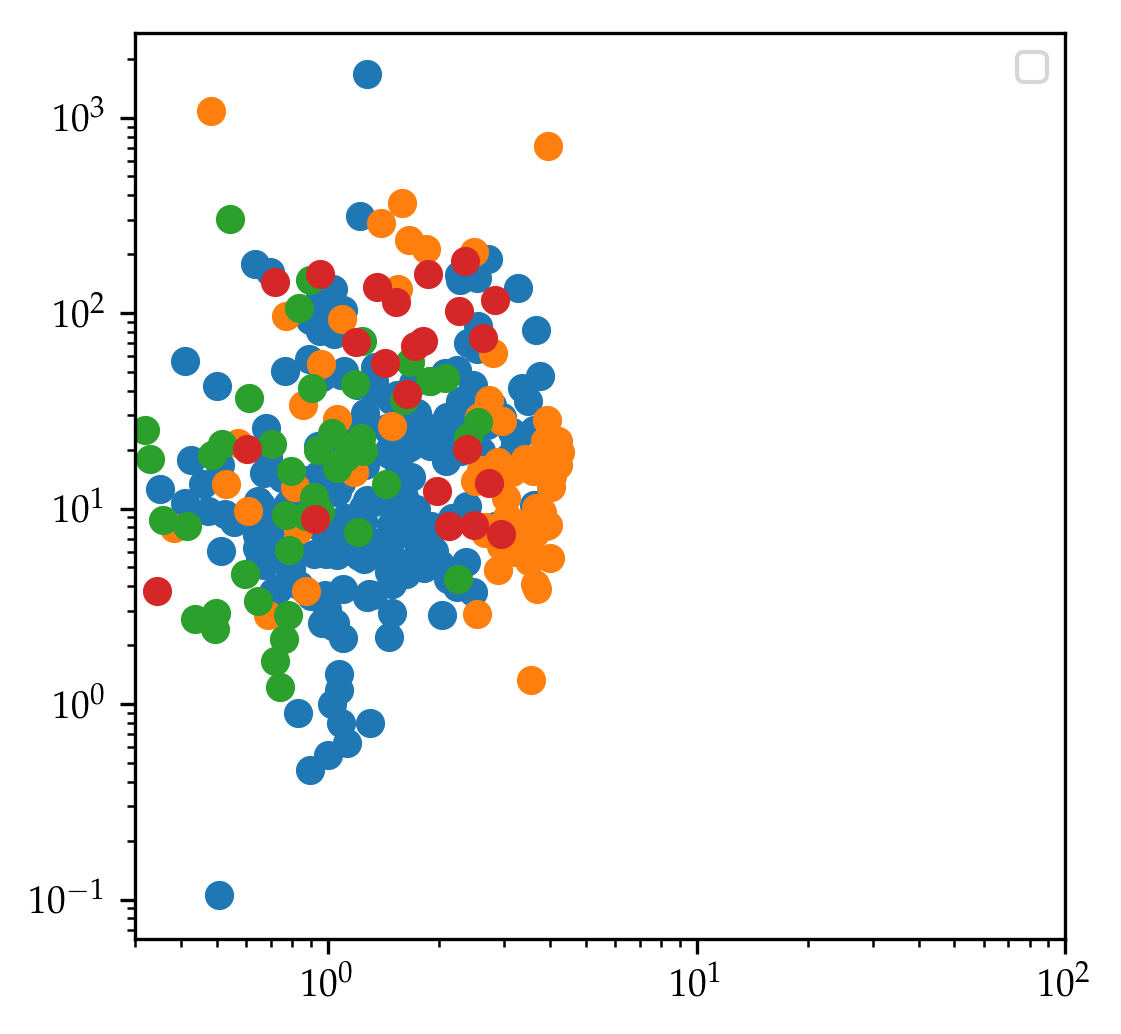

In [36]:
xfit = np.array([100,1e13])
n1 = 3.6*(datat1['mstar'][datat1['time']>9.0]/10**10)**(-.35)    #unitlessRogue['G_outflow_1.5']
n2 = 3.6*(datat2['mstar'][datat2['time']>9.0]/10**10)**(-.35)
n3 = 3.6*(datat3['mstar'][datat3['time']>9.0]/10**10)**(-.35)
n4 = 3.6*(datat4['mstar'][datat4['time']>9.0]/10**10)**(-.35)
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(datat1['h1dist'][datat1['time']>9.0], abs(datat1['outflow_23'][datat1['time']>9.0]/datat1['sfr'][datat1['time']>9.0] - n1))#, c=datat1['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat2['h1dist'][datat2['time']>9.0], abs(datat2['outflow_23'][datat2['time']>9.0]/datat2['sfr'][datat2['time']>9.0] - n2))#, c=datat2['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat3['h1dist'][datat3['time']>9.0], abs(datat3['outflow_23'][datat3['time']>9.0]/datat3['sfr'][datat3['time']>9.0] - n3))#, c=datat3['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat4['h1dist'][datat4['time']>9.0], abs(datat4['outflow_23'][datat4['time']>9.0]/datat4['sfr'][datat4['time']>9.0] - n4))#, c=datat4['time'], cmap='plasma', label=None, s=15)
plt.legend()
plt.loglog()
# plt.ylim(.2, 5e2)
plt.xlim(3e-1, 1e2)

No handles with labels found to put in legend.


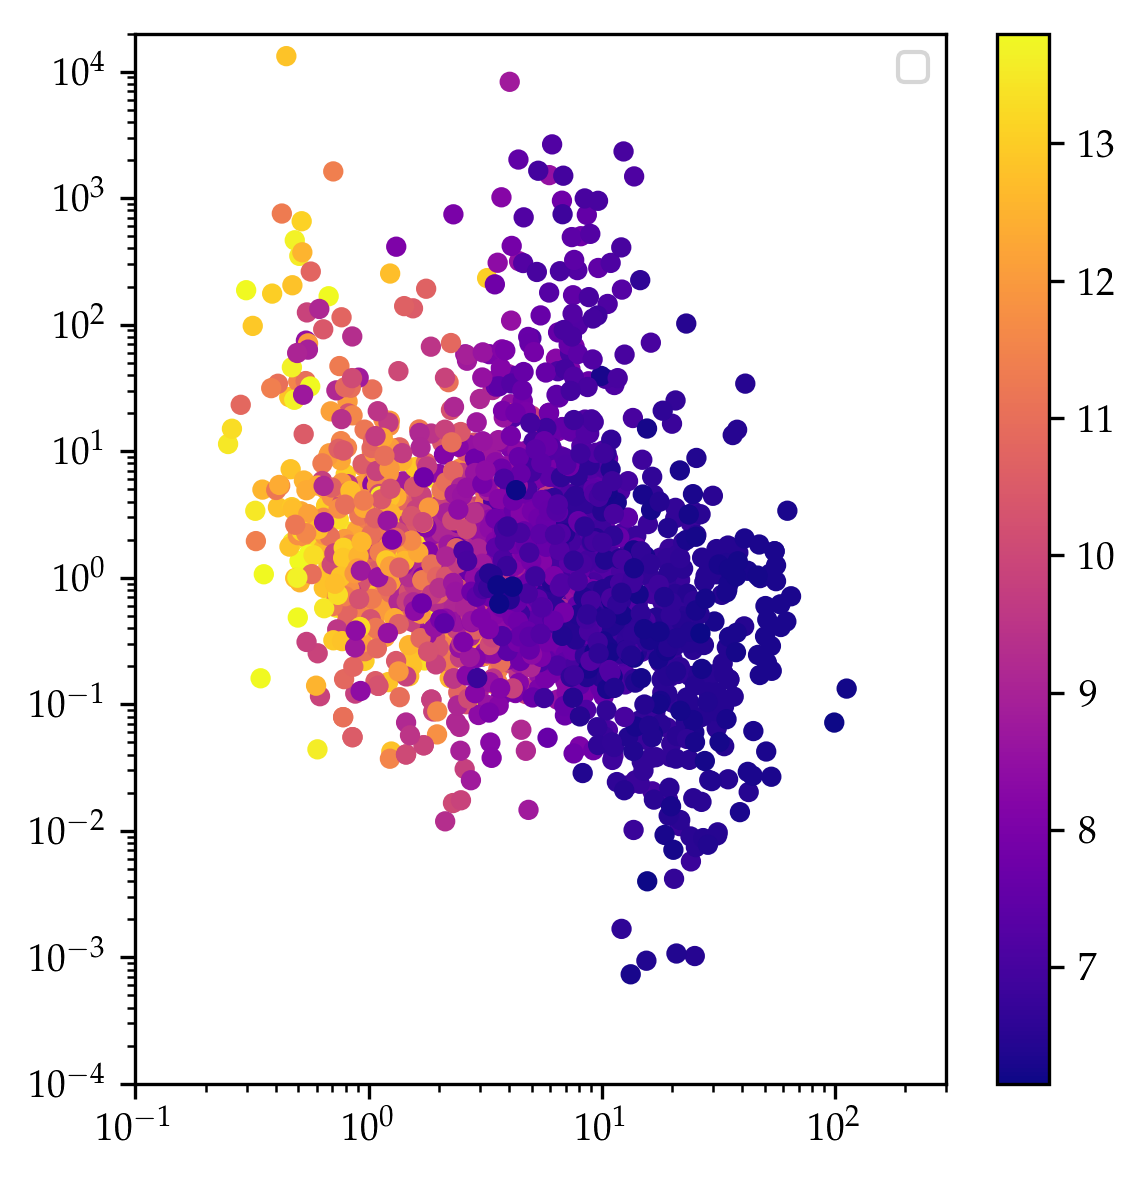

In [68]:
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(datat1['h1dist'], abs(datat1['outflow_23']/datat1['inflow_23']), c=datat1['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat2['h1dist'], abs(datat2['outflow_23']/datat2['inflow_23']), c=datat2['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat3['h1dist'], abs(datat3['outflow_23']/datat3['inflow_23']), c=datat3['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat4['h1dist'], abs(datat4['outflow_23']/datat4['inflow_23']), c=datat4['time'], cmap='plasma', label=None, s=15)
plt.colorbar()

plt.legend()
plt.loglog()
plt.ylim(1e-4, 2e4)
plt.xlim(1e-1, 3e2)
# plt.xlabel(r'Stellar Mass ($M_{\odot}$) at z=0')
# plt.ylabel(r'$\eta = M_{out}/$SFR')
plt.tight_layout()

No handles with labels found to put in legend.


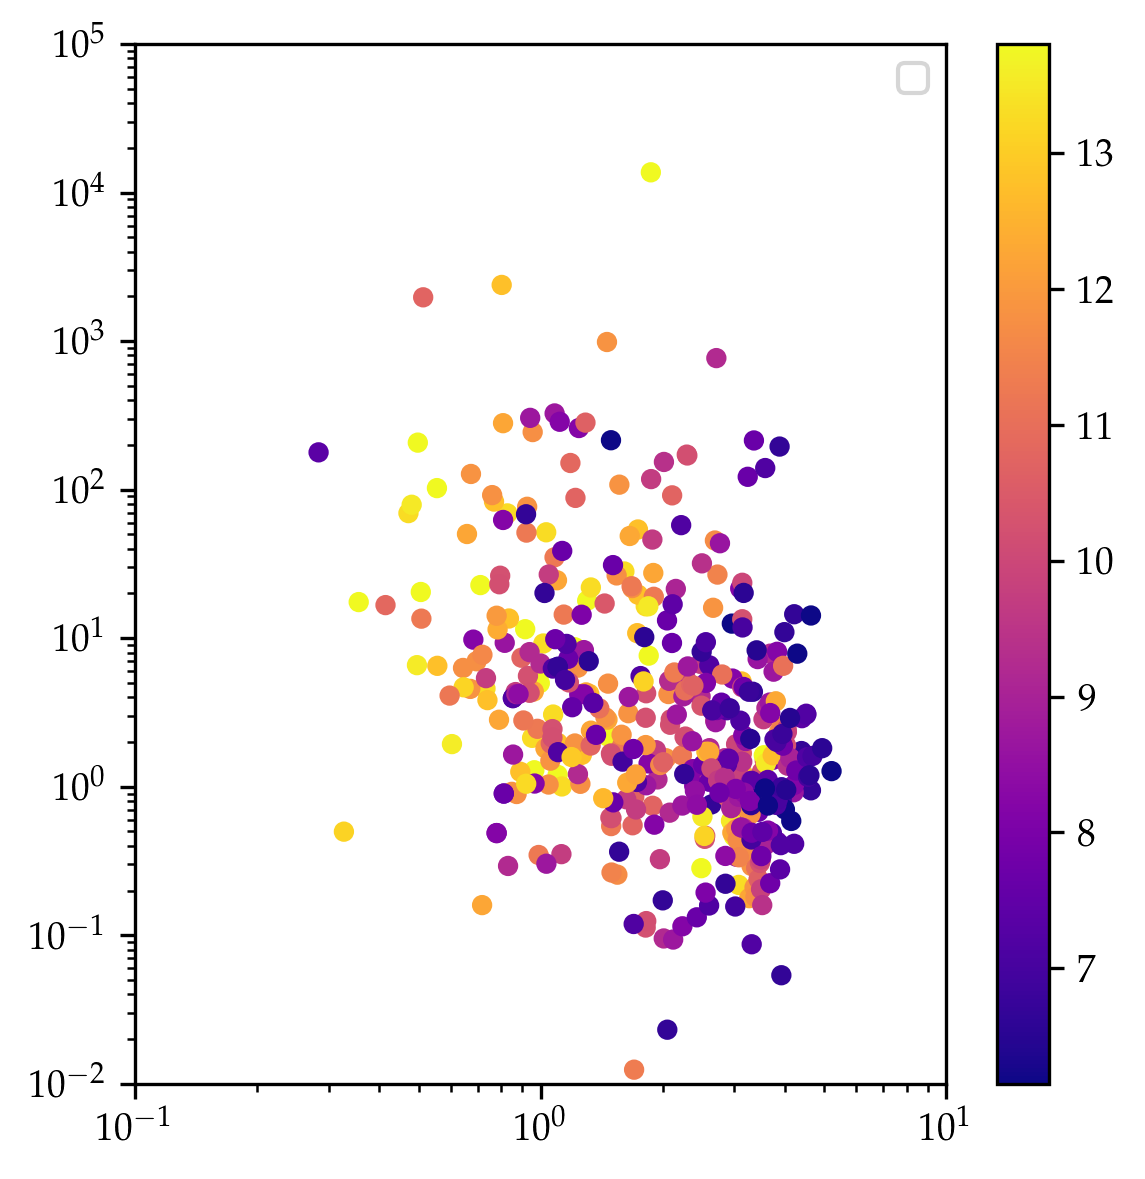

In [79]:
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(datat1['h1dist'], abs(datat1['outflow_91']/datat1['inflow_91']), c=datat1['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat2['h1dist'], abs(datat2['outflow_91']/datat2['inflow_91']), c=datat2['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat3['h1dist'], abs(datat3['outflow_91']/datat3['inflow_91']), c=datat3['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat4['h1dist'], abs(datat4['outflow_91']/datat4['inflow_91']), c=datat4['time'], cmap='plasma', label=None, s=15)
plt.colorbar()

plt.legend()
plt.loglog()
plt.ylim(1e-2, 1e5)
plt.xlim(1e-1, 10)
# plt.xlabel(r'Stellar Mass ($M_{\odot}$) at z=0')
# plt.ylabel(r'$\eta = M_{out}/$SFR')
plt.tight_layout()

No handles with labels found to put in legend.


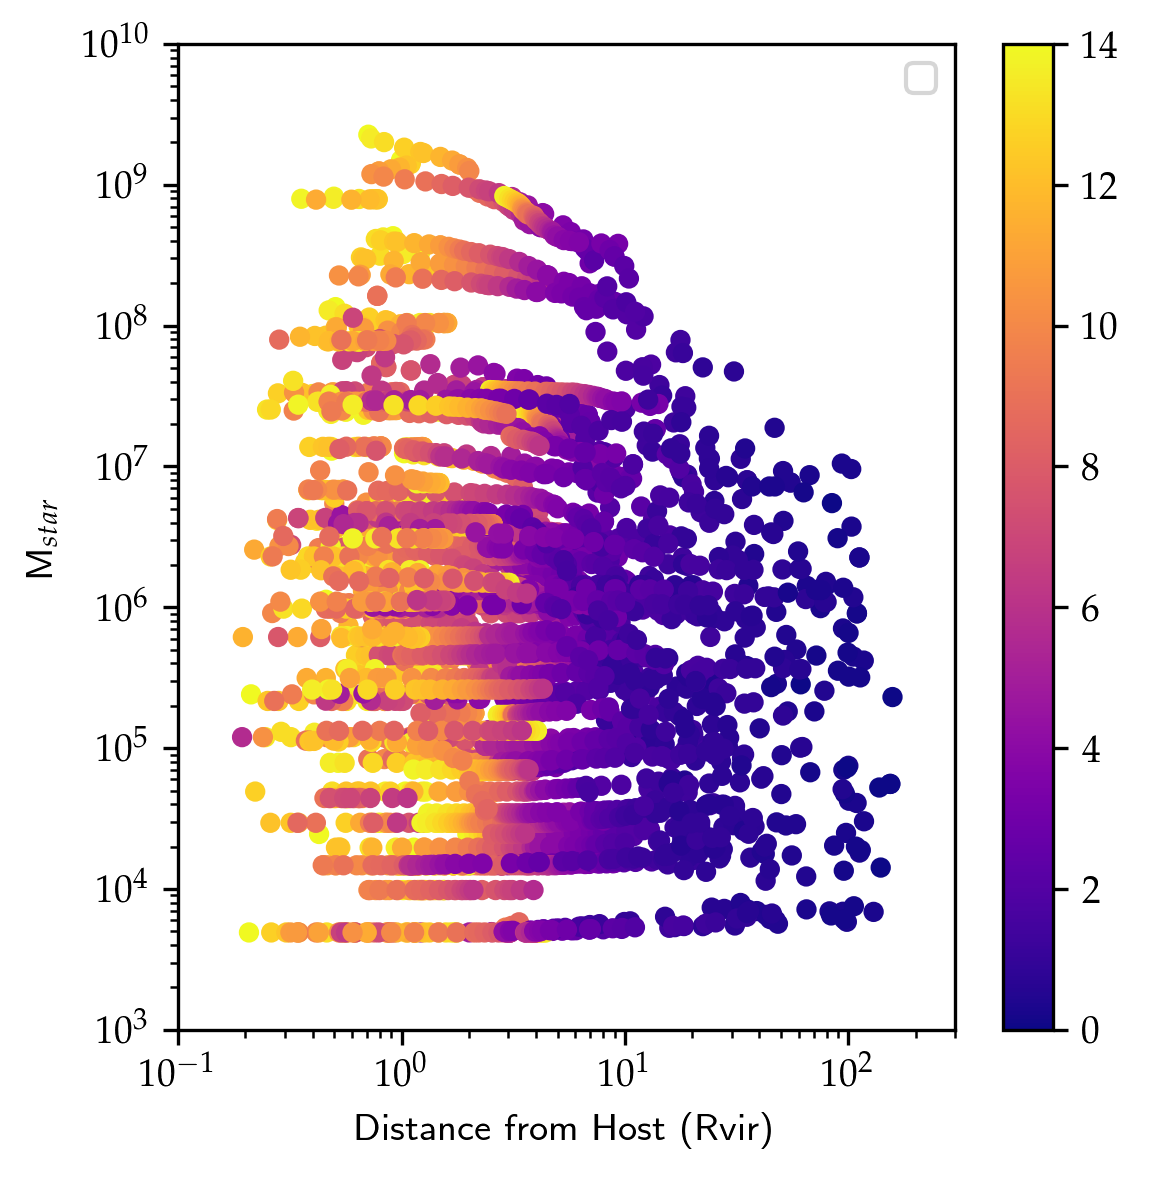

In [105]:
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(datat1['h1dist'], datat1['mstar'], c=datat1['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat2['h1dist'], datat2['mstar'], c=datat2['time'], cmap='plasma', label=None, s=15, vmin=0, vmax=14)
plt.scatter(datat3['h1dist'], datat3['mstar'], c=datat3['time'], cmap='plasma', label=None, s=15, vmin=0, vmax=14)
plt.scatter(datat4['h1dist'], datat4['mstar'], c=datat4['time'], cmap='plasma', label=None, s=15, vmin=0, vmax=14)
plt.colorbar()

plt.legend()
plt.loglog()
plt.ylim(1e3, 1e10)
plt.xlim(1e-1, 3e2)
plt.xlabel(r'Distance from Host (Rvir)')
plt.ylabel(r'M$_{star}$')
plt.tight_layout()

No handles with labels found to put in legend.


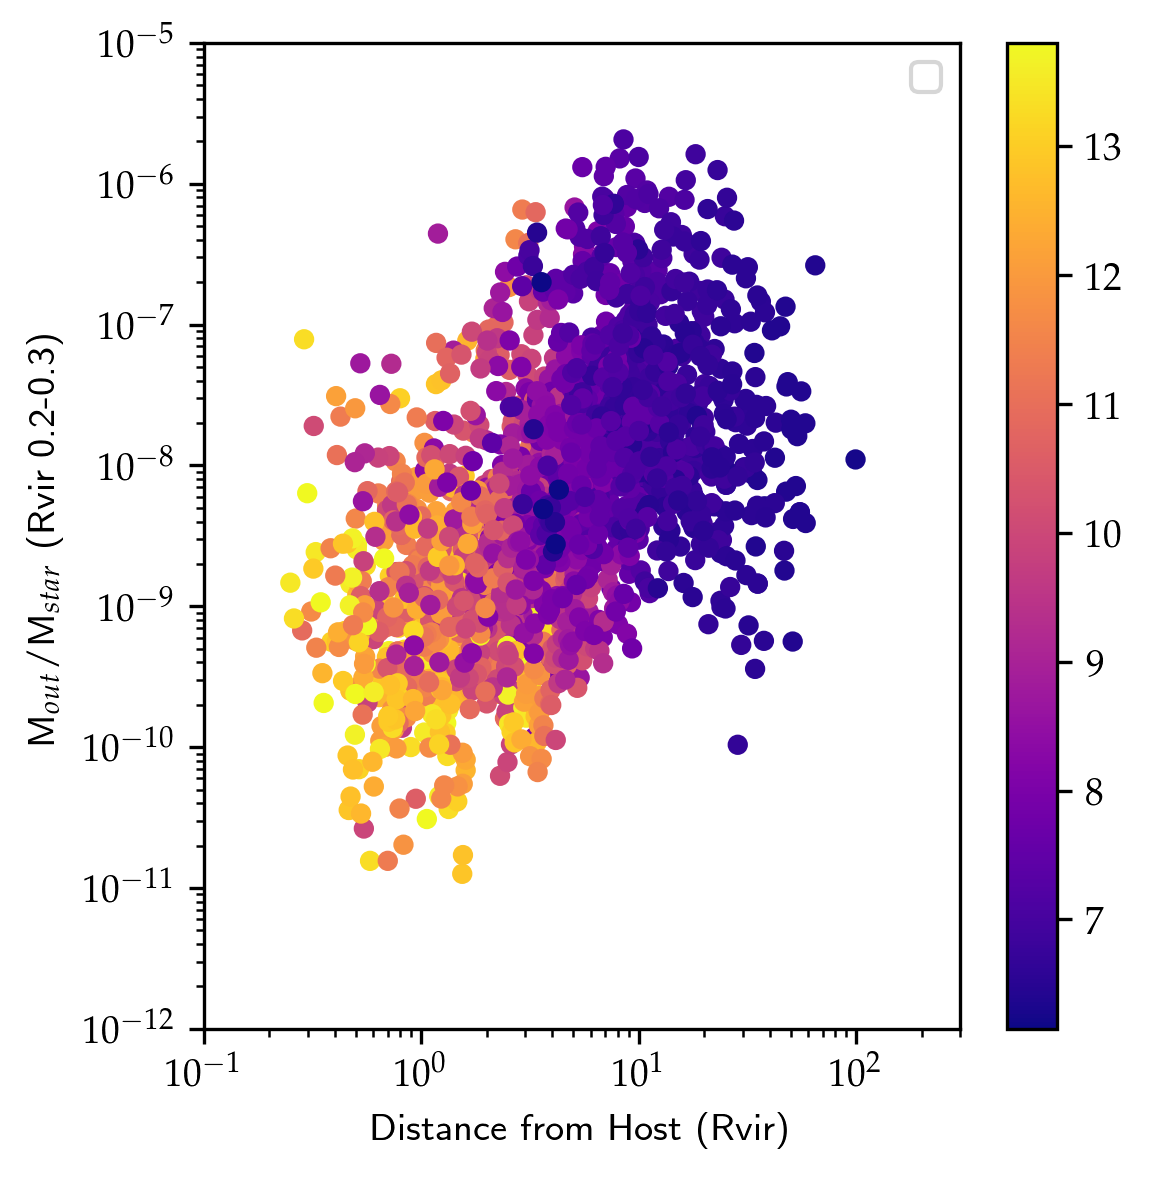

In [60]:
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(datat1['h1dist'], abs(datat1['outflow_23']/datat1['mstar']), c=datat1['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat2['h1dist'], abs(datat2['outflow_23']/datat2['mstar']), c=datat2['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat3['h1dist'], abs(datat3['outflow_23']/datat3['mstar']), c=datat3['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat4['h1dist'], abs(datat4['outflow_23']/datat4['mstar']), c=datat4['time'], cmap='plasma', label=None, s=15)
plt.colorbar()

plt.legend()
plt.loglog()
plt.ylim(1e-12, 1e-5)
plt.xlim(1e-1, 3e2)
plt.xlabel(r'Distance from Host (Rvir)')
plt.ylabel(r'M$_{out}/$M$_{star}$ (Rvir 0.2-0.3)')
plt.tight_layout()

No handles with labels found to put in legend.


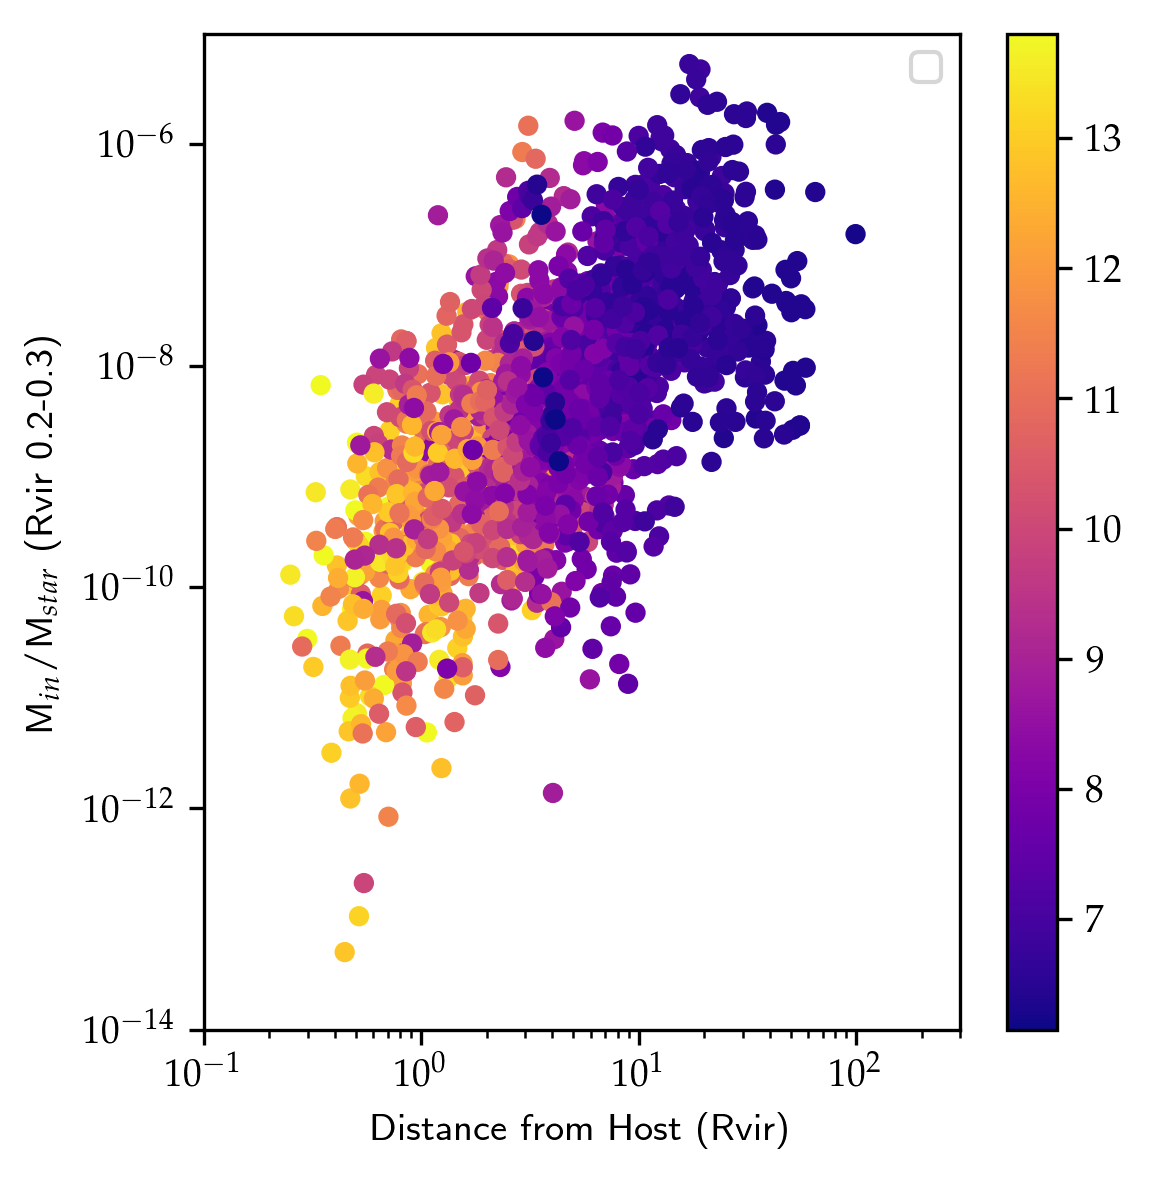

In [61]:
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(datat1['h1dist'], abs(datat1['inflow_23']/datat1['mstar']), c=datat1['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat2['h1dist'], abs(datat2['inflow_23']/datat2['mstar']), c=datat2['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat3['h1dist'], abs(datat3['inflow_23']/datat3['mstar']), c=datat3['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat4['h1dist'], abs(datat4['inflow_23']/datat4['mstar']), c=datat4['time'], cmap='plasma', label=None, s=15)
plt.colorbar()

plt.legend()
plt.loglog()
plt.ylim(1e-14, 1e-5)
plt.xlim(1e-1, 3e2)
plt.xlabel(r'Distance from Host (Rvir)')
plt.ylabel(r'M$_{in}/$M$_{star}$ (Rvir 0.2-0.3)')
plt.tight_layout()

No handles with labels found to put in legend.


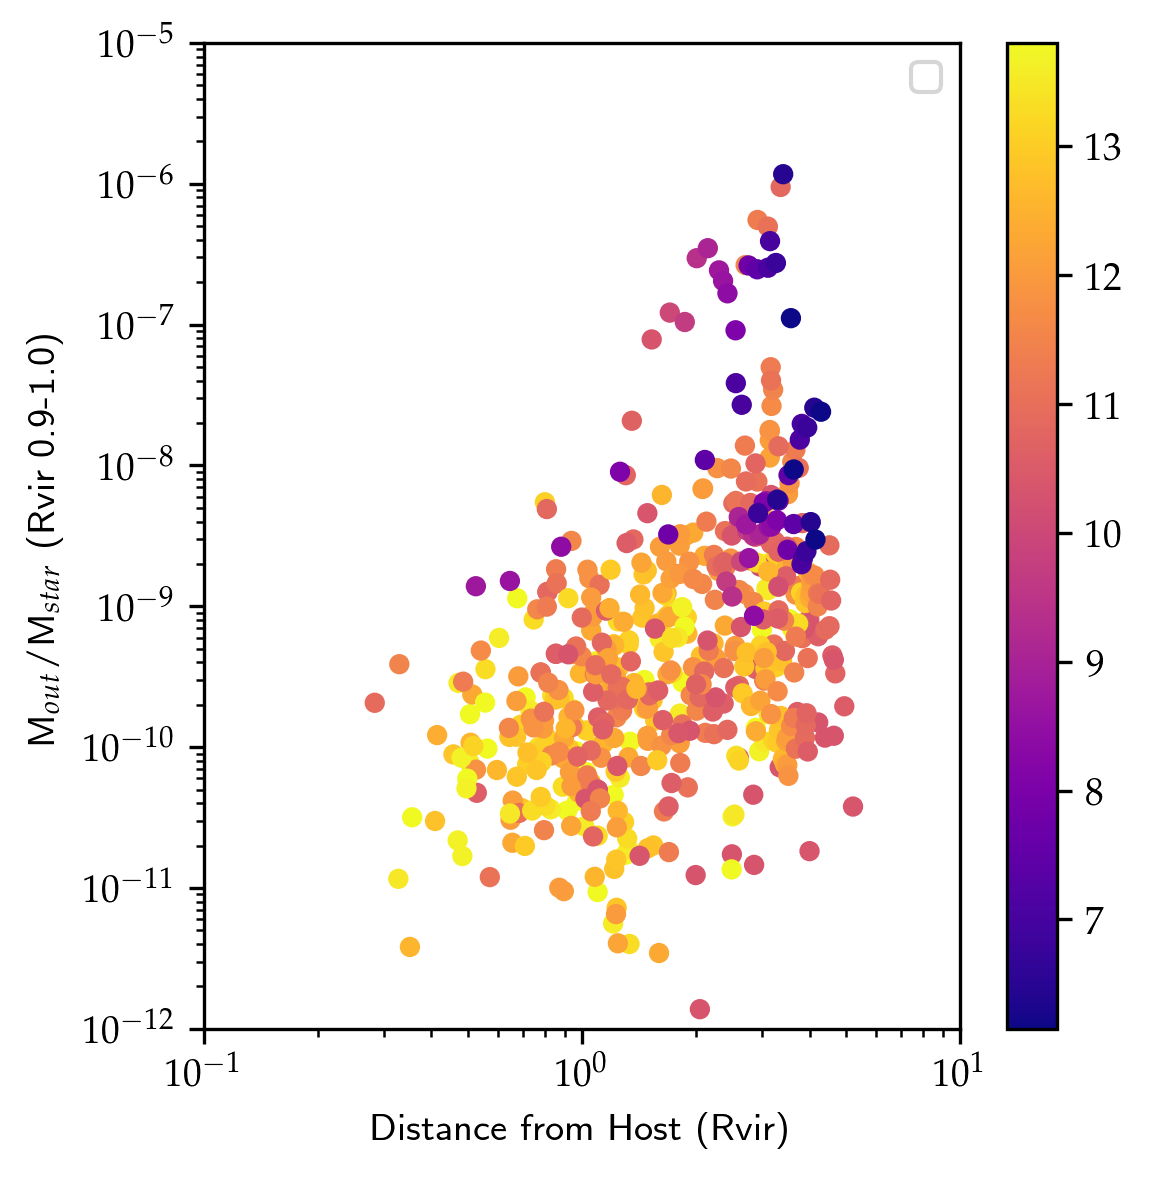

In [62]:
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(datat1['h1dist'], abs(datat1['outflow_91']/datat1['mstar']), c=datat1['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat2['h1dist'], abs(datat2['outflow_91']/datat2['mstar']), c=datat2['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat3['h1dist'], abs(datat3['outflow_91']/datat3['mstar']), c=datat3['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat4['h1dist'], abs(datat4['outflow_91']/datat4['mstar']), c=datat4['time'], cmap='plasma', label=None, s=15)
plt.colorbar()

plt.legend()
plt.loglog()
plt.ylim(1e-12, 1e-5)
plt.xlim(1e-1, 10)
plt.xlabel(r'Distance from Host (Rvir)')
plt.ylabel(r'M$_{out}/$M$_{star}$ (Rvir 0.9-1.0)')
plt.tight_layout()

No handles with labels found to put in legend.


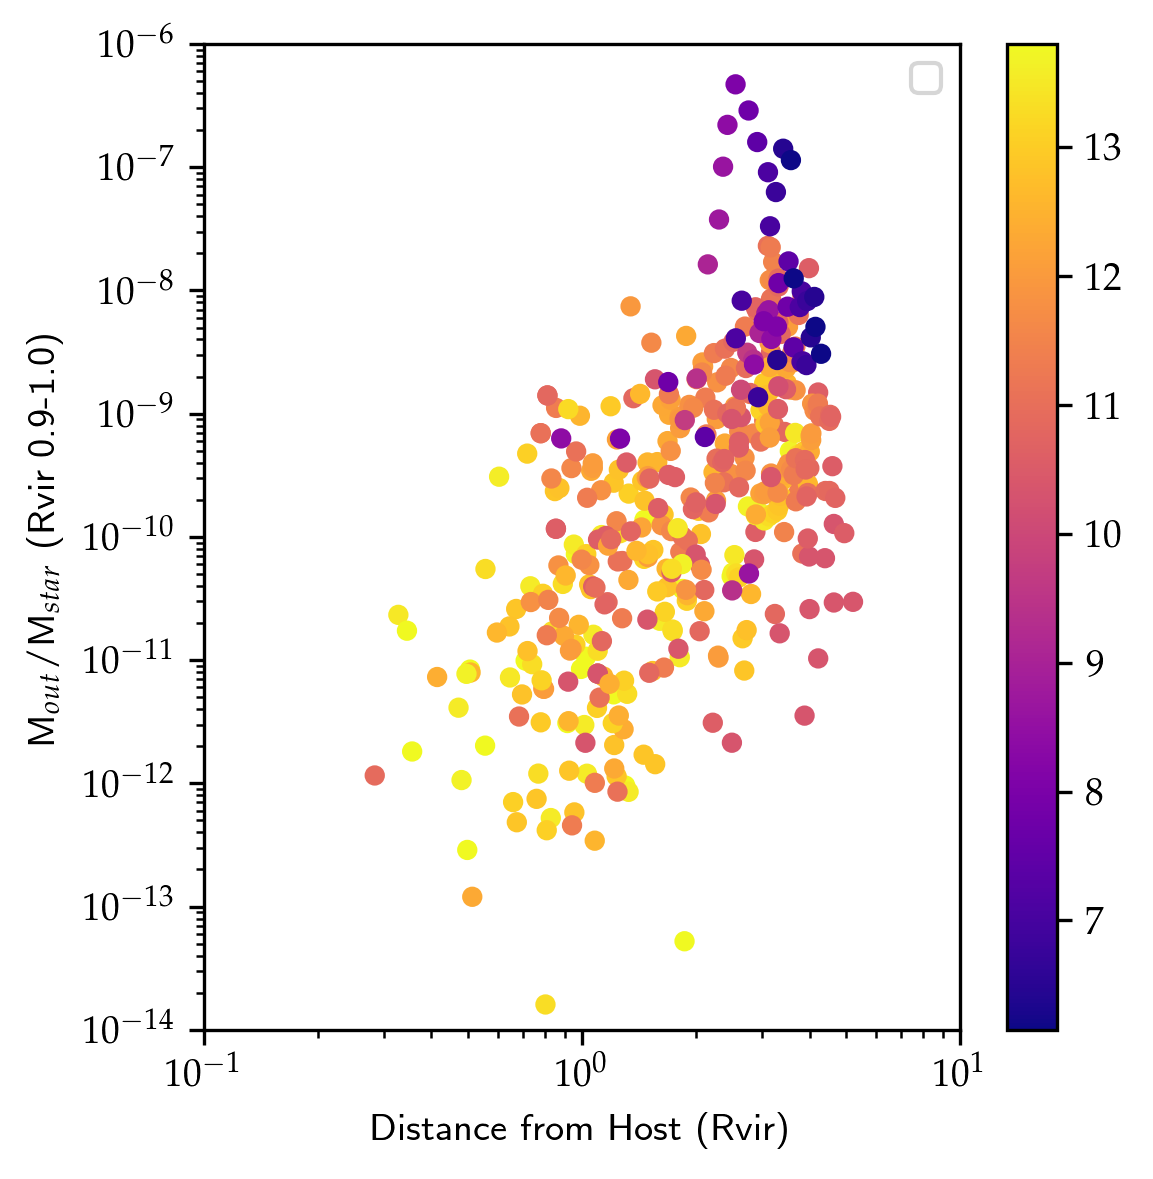

In [65]:
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(datat1['h1dist'], abs(datat1['inflow_91']/datat1['mstar']), c=datat1['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat2['h1dist'], abs(datat2['inflow_91']/datat2['mstar']), c=datat2['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat3['h1dist'], abs(datat3['inflow_91']/datat3['mstar']), c=datat3['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat4['h1dist'], abs(datat4['inflow_91']/datat4['mstar']), c=datat4['time'], cmap='plasma', label=None, s=15)
plt.colorbar()

plt.legend()
plt.loglog()
plt.ylim(1e-14, 1e-6)
plt.xlim(1e-1, 10)
plt.xlabel(r'Distance from Host (Rvir)')
plt.ylabel(r'M$_{out}/$M$_{star}$ (Rvir 0.9-1.0)')
plt.tight_layout()

No handles with labels found to put in legend.


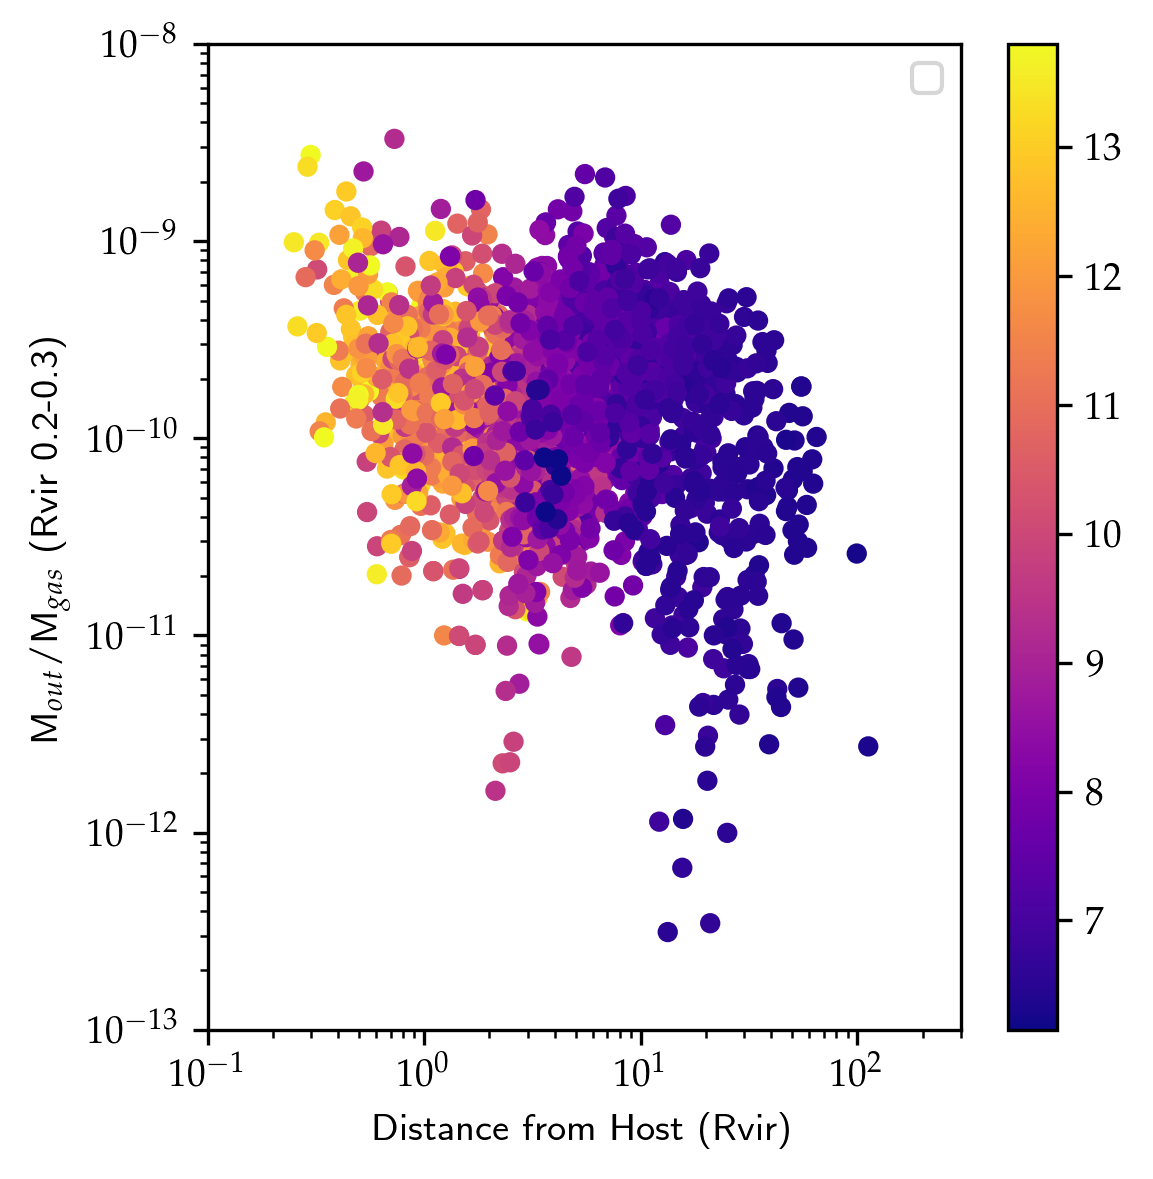

In [82]:
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(datat1['h1dist'], abs(datat1['outflow_23']/datat1['mgas']), c=datat1['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat2['h1dist'], abs(datat2['outflow_23']/datat2['mgas']), c=datat2['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat3['h1dist'], abs(datat3['outflow_23']/datat3['mgas']), c=datat3['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat4['h1dist'], abs(datat4['outflow_23']/datat4['mgas']), c=datat4['time'], cmap='plasma', label=None, s=15)
plt.colorbar()

plt.legend()
plt.loglog()
plt.ylim(1e-13, 1e-8)
plt.xlim(1e-1, 3e2)
plt.xlabel(r'Distance from Host (Rvir)')
plt.ylabel(r'M$_{out}/$M$_{gas}$ (Rvir 0.2-0.3)')
plt.tight_layout()

No handles with labels found to put in legend.


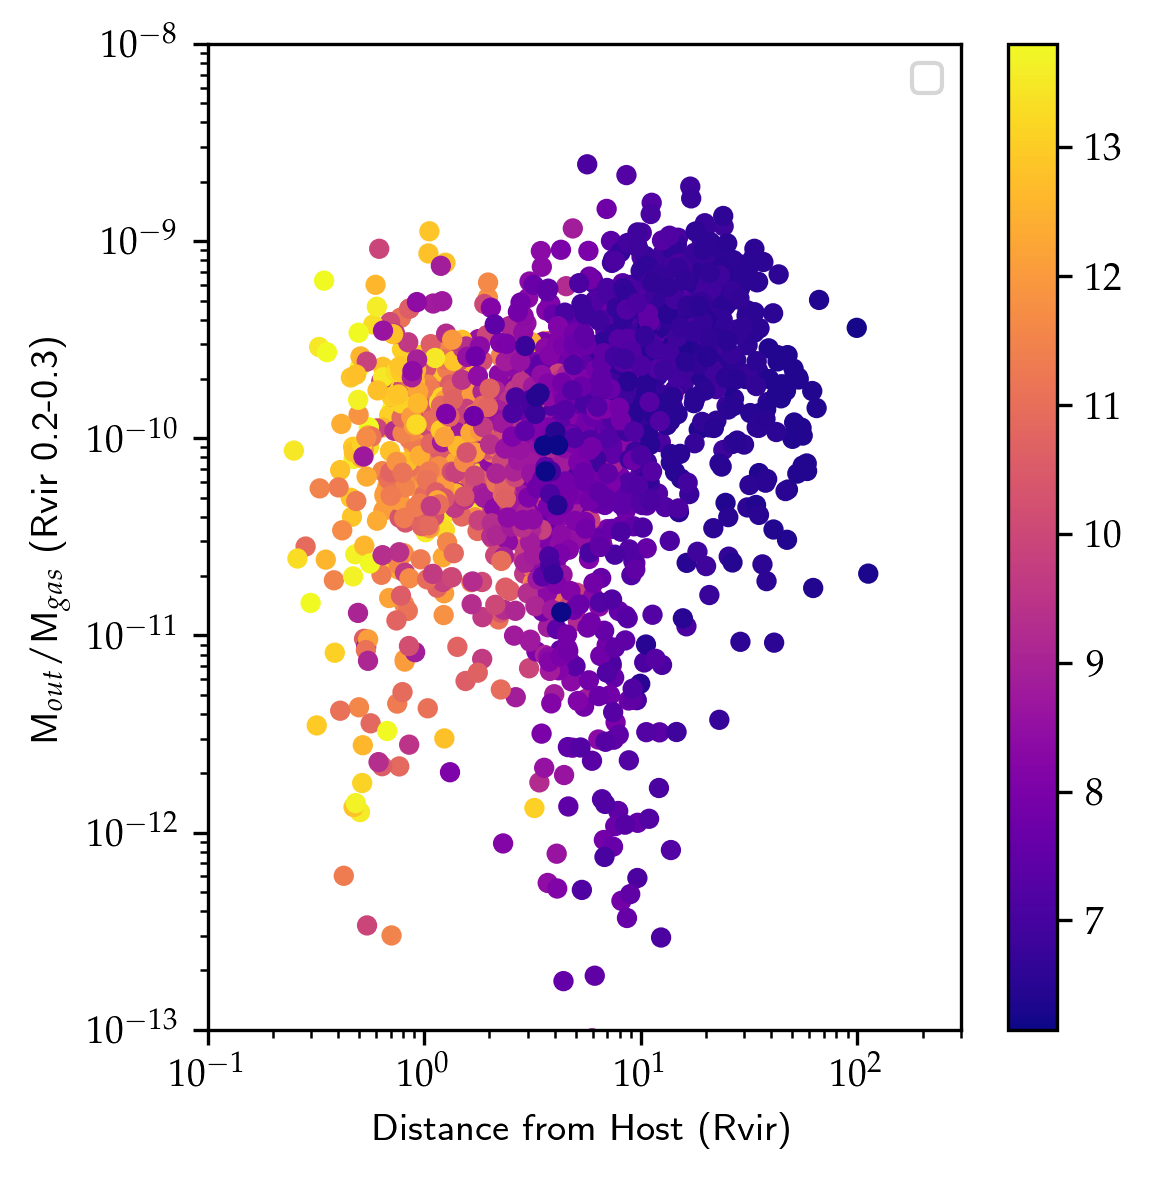

In [83]:
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(datat1['h1dist'], abs(datat1['inflow_23']/datat1['mgas']), c=datat1['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat2['h1dist'], abs(datat2['inflow_23']/datat2['mgas']), c=datat2['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat3['h1dist'], abs(datat3['inflow_23']/datat3['mgas']), c=datat3['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat4['h1dist'], abs(datat4['inflow_23']/datat4['mgas']), c=datat4['time'], cmap='plasma', label=None, s=15)
plt.colorbar()

plt.legend()
plt.loglog()
plt.ylim(1e-13, 1e-8)
plt.xlim(1e-1, 3e2)
plt.xlabel(r'Distance from Host (Rvir)')
plt.ylabel(r'M$_{out}/$M$_{gas}$ (Rvir 0.2-0.3)')
plt.tight_layout()

No handles with labels found to put in legend.


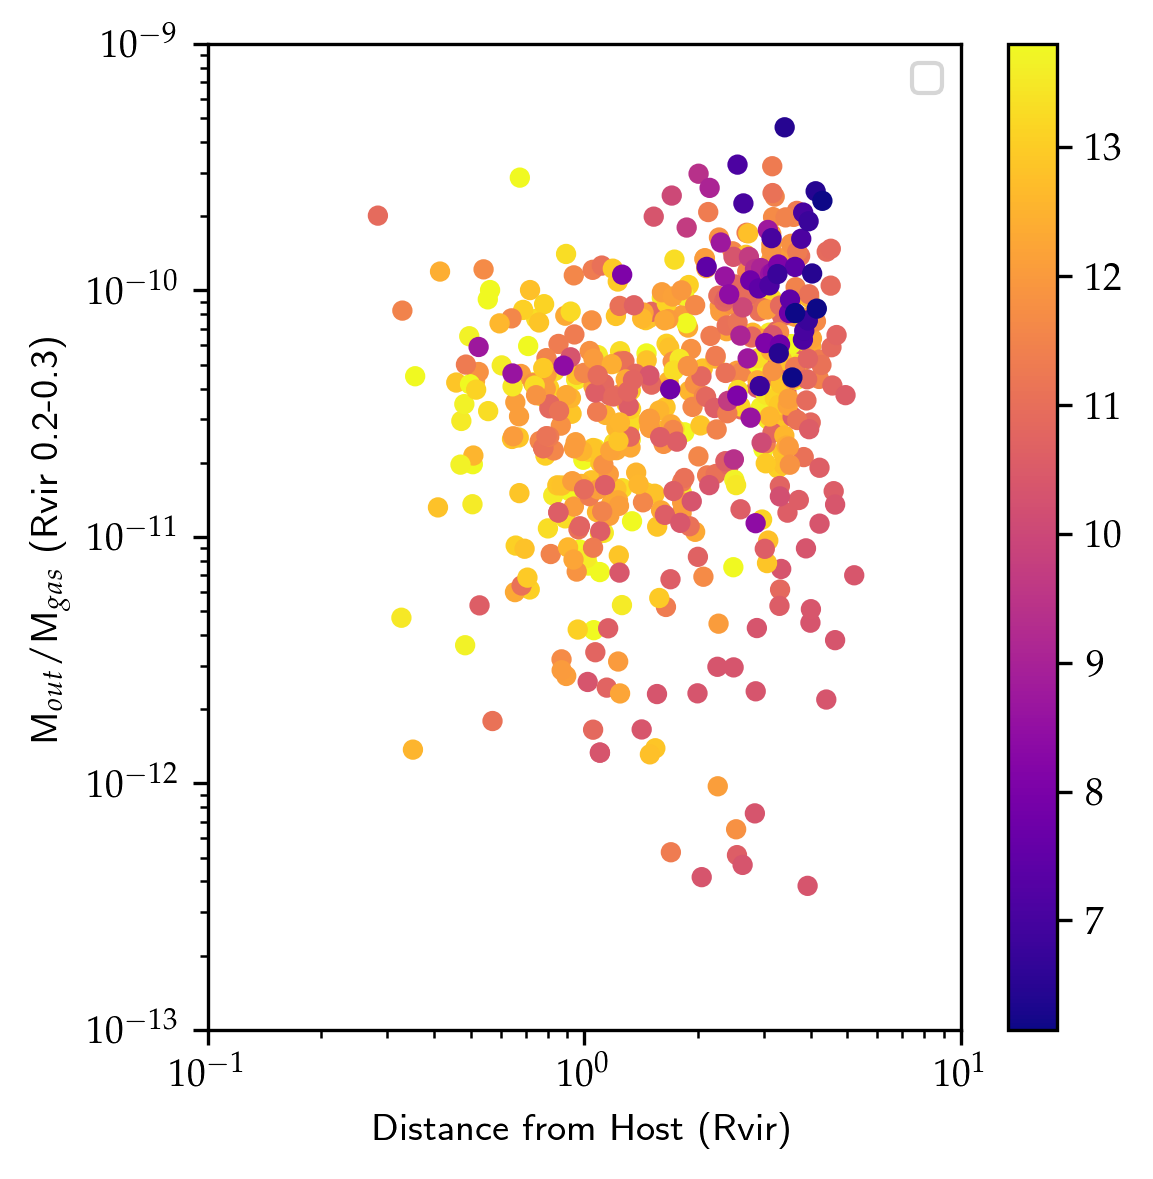

In [85]:
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(datat1['h1dist'], abs(datat1['outflow_91']/datat1['mgas']), c=datat1['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat2['h1dist'], abs(datat2['outflow_91']/datat2['mgas']), c=datat2['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat3['h1dist'], abs(datat3['outflow_91']/datat3['mgas']), c=datat3['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat4['h1dist'], abs(datat4['outflow_91']/datat4['mgas']), c=datat4['time'], cmap='plasma', label=None, s=15)
plt.colorbar()

plt.legend()
plt.loglog()
plt.ylim(1e-13, 1e-9)
plt.xlim(1e-1, 10)
plt.xlabel(r'Distance from Host (Rvir)')
plt.ylabel(r'M$_{out}/$M$_{gas}$ (Rvir 0.2-0.3)')
plt.tight_layout()

No handles with labels found to put in legend.


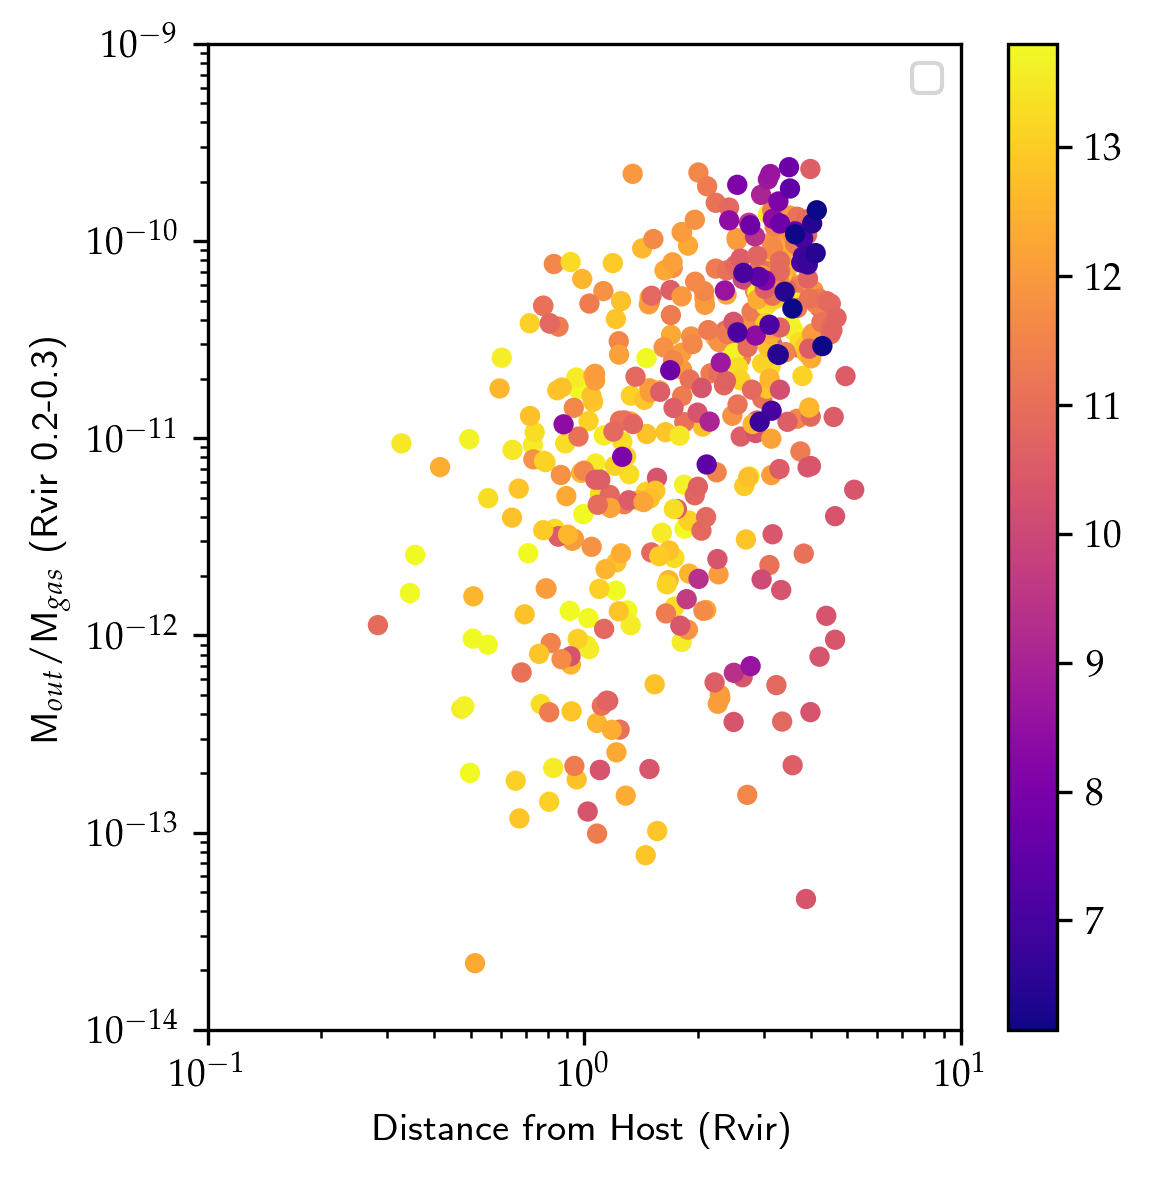

In [87]:
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(datat1['h1dist'], abs(datat1['inflow_91']/datat1['mgas']), c=datat1['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat2['h1dist'], abs(datat2['inflow_91']/datat2['mgas']), c=datat2['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat3['h1dist'], abs(datat3['inflow_91']/datat3['mgas']), c=datat3['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat4['h1dist'], abs(datat4['inflow_91']/datat4['mgas']), c=datat4['time'], cmap='plasma', label=None, s=15)
plt.colorbar()

plt.legend()
plt.loglog()
plt.ylim(1e-14, 1e-9)
plt.xlim(1e-1, 10)
plt.xlabel(r'Distance from Host (Rvir)')
plt.ylabel(r'M$_{out}/$M$_{gas}$ (Rvir 0.2-0.3)')
plt.tight_layout()

In [101]:
len(np.unique(datat1['time'])) #[datat1['z0haloid']==2]

43

No handles with labels found to put in legend.


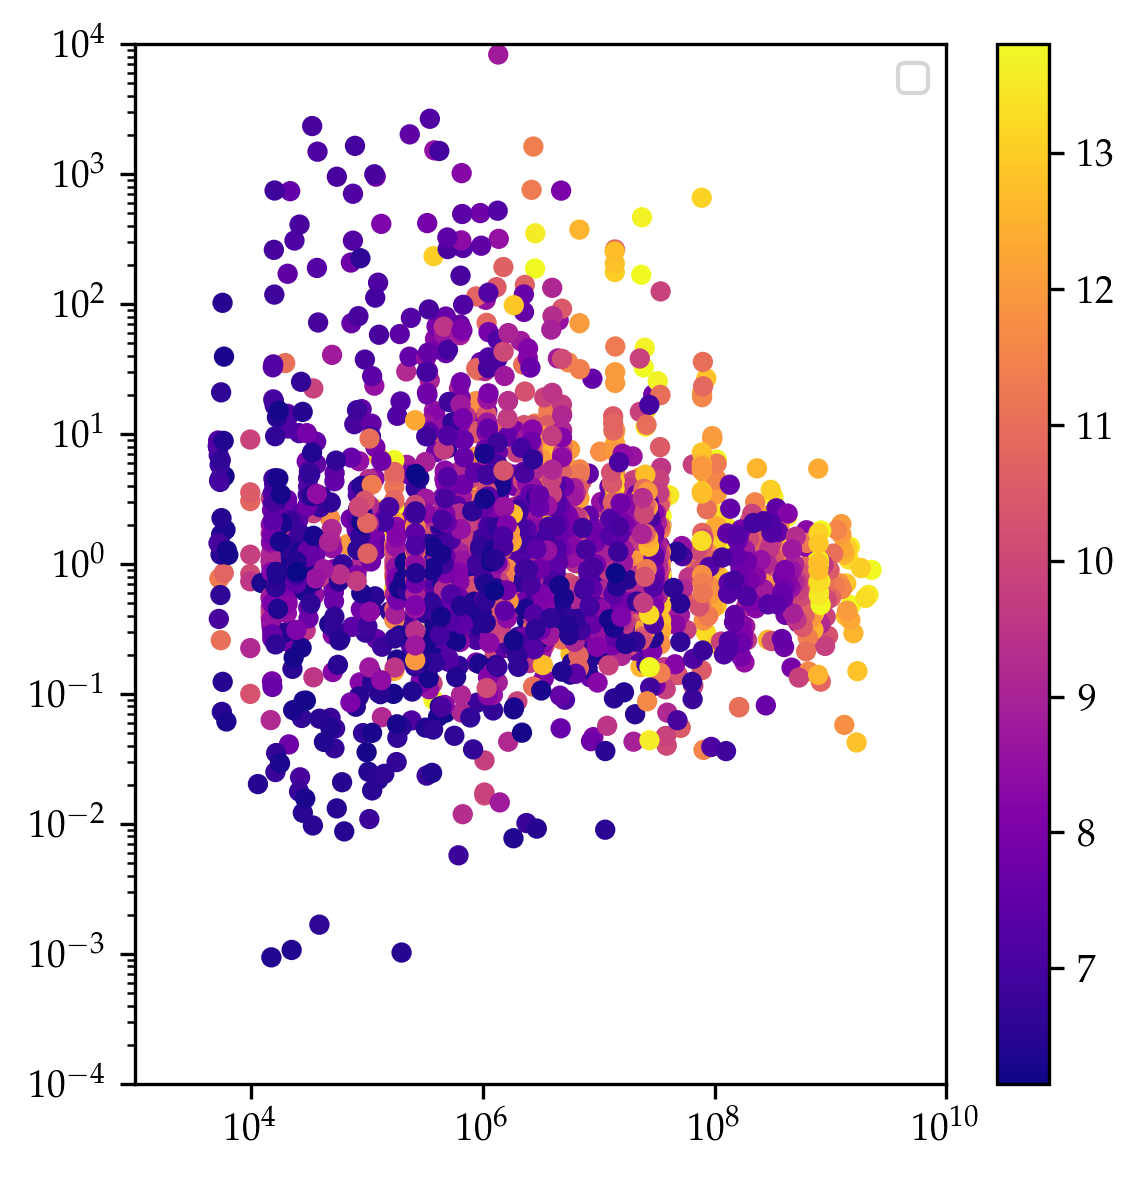

In [111]:
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(datat1['mstar'], abs(datat1['outflow_23']/datat1['inflow_23']), c=datat1['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat2['mstar'], abs(datat2['outflow_23']/datat2['inflow_23']), c=datat2['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat3['mstar'], abs(datat3['outflow_23']/datat3['inflow_23']), c=datat3['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat4['mstar'], abs(datat4['outflow_23']/datat4['inflow_23']), c=datat4['time'], cmap='plasma', label=None, s=15)
plt.colorbar()

plt.legend()
plt.loglog()
plt.ylim(1e-4, 1e4)
plt.xlim(1e3, 1e10)
# plt.xlabel(r'Distance from Host (Rvir)')
# plt.ylabel(r'M$_{out}/$M$_{gas}$ (Rvir 0.2-0.3)')
plt.tight_layout()

No handles with labels found to put in legend.


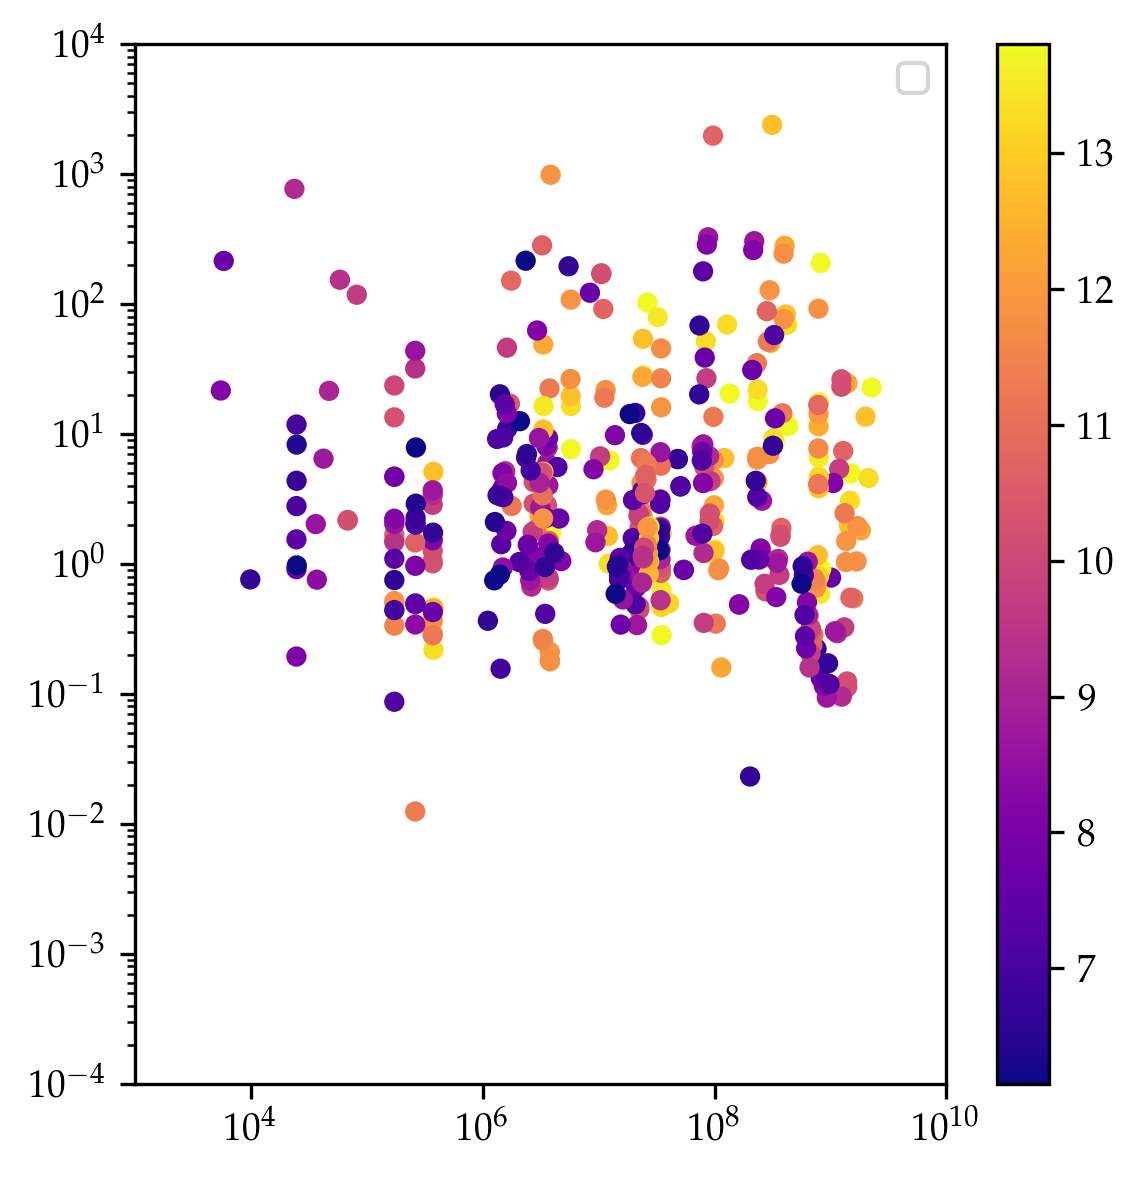

In [110]:
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(datat1['mstar'], abs(datat1['outflow_91']/datat1['inflow_91']), c=datat1['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat2['mstar'], abs(datat2['outflow_91']/datat2['inflow_91']), c=datat2['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat3['mstar'], abs(datat3['outflow_91']/datat3['inflow_91']), c=datat3['time'], cmap='plasma', label=None, s=15)
plt.scatter(datat4['mstar'], abs(datat4['outflow_91']/datat4['inflow_91']), c=datat4['time'], cmap='plasma', label=None, s=15)
plt.colorbar()

plt.legend()
plt.loglog()
plt.ylim(1e-4, 1e4)
plt.xlim(1e3, 1e10)
# plt.xlabel(r'Distance from Host (Rvir)')
# plt.ylabel(r'M$_{out}/$M$_{gas}$ (Rvir 0.2-0.3)')
plt.tight_layout()